In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [126]:
df.shape
df.columns


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [127]:
df.info()
df.isnull().sum()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [128]:
df.duplicated().sum()

0

In [129]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [130]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [131]:
df["math_score"].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

In [132]:
print("Categories in'gender' variable: ",end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental level of education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable: ",end=" ")
print(df['test_preparation_course'].unique())


Categories in'gender' variable:  ['female' 'male']
categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:  ['standard' 'free/reduced']
categories in 'test preparation course' variable:  ['none' 'completed']


In [133]:
categorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns
categorical_features, numerical_features


(Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
        'test_preparation_course'],
       dtype='object'),
 Index(['math_score', 'reading_score', 'writing_score'], dtype='object'))

In [134]:
#total score for all 3 subjects

df['total_score'] = (
    df['math_score'] +
    df['reading_score'] +
    df['writing_score']
)


#average Score

df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [135]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in maths: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in reading: {reading_full}')


Number of students with full marks in maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [136]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in maths: {math_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')

Number of students with less than 20 marks in maths: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in reading: 1


<function matplotlib.pyplot.show(close=None, block=None)>

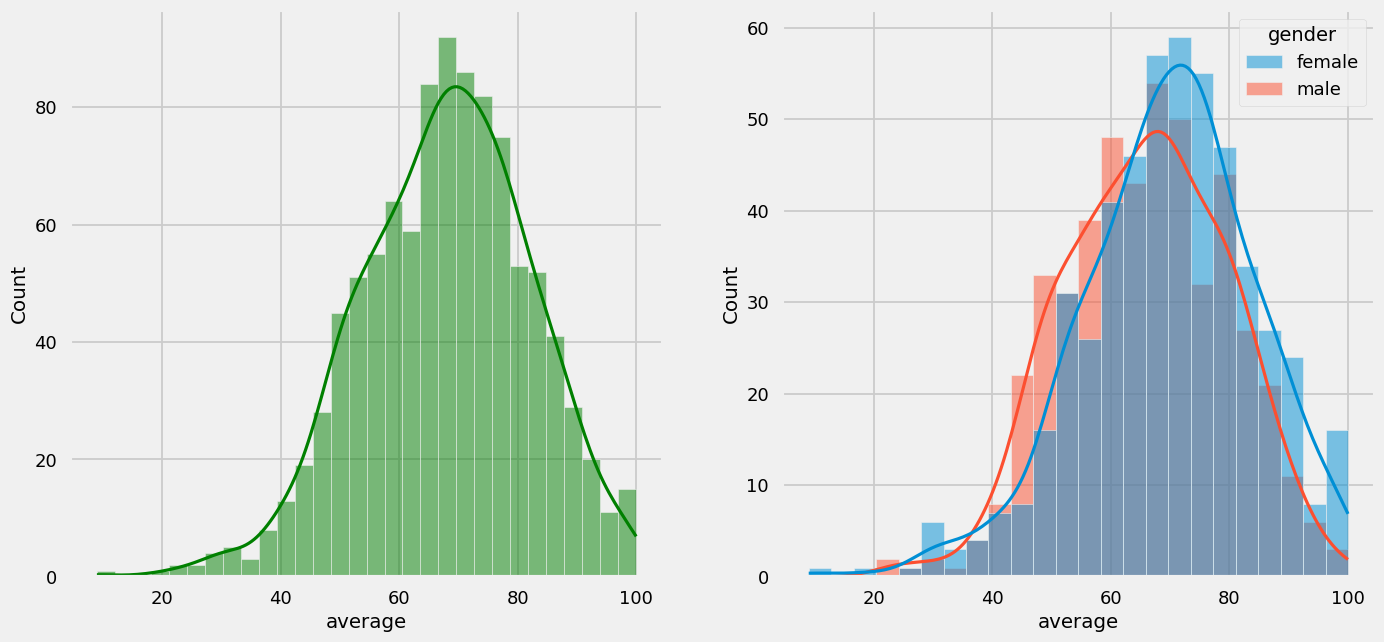

In [137]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x= 'average',bins=30,kde=True,color= 'g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde= True,hue='gender')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

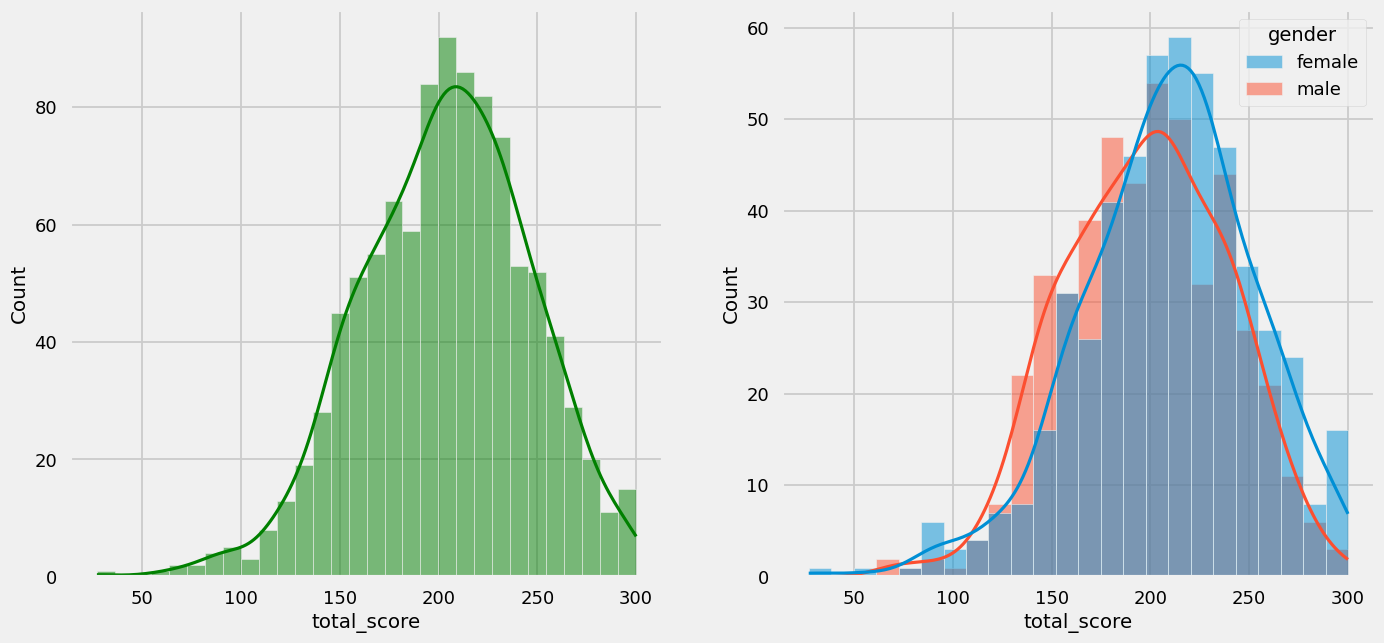

In [138]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x= 'total_score',bins=30,kde=True,color= 'g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde= True,hue='gender')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

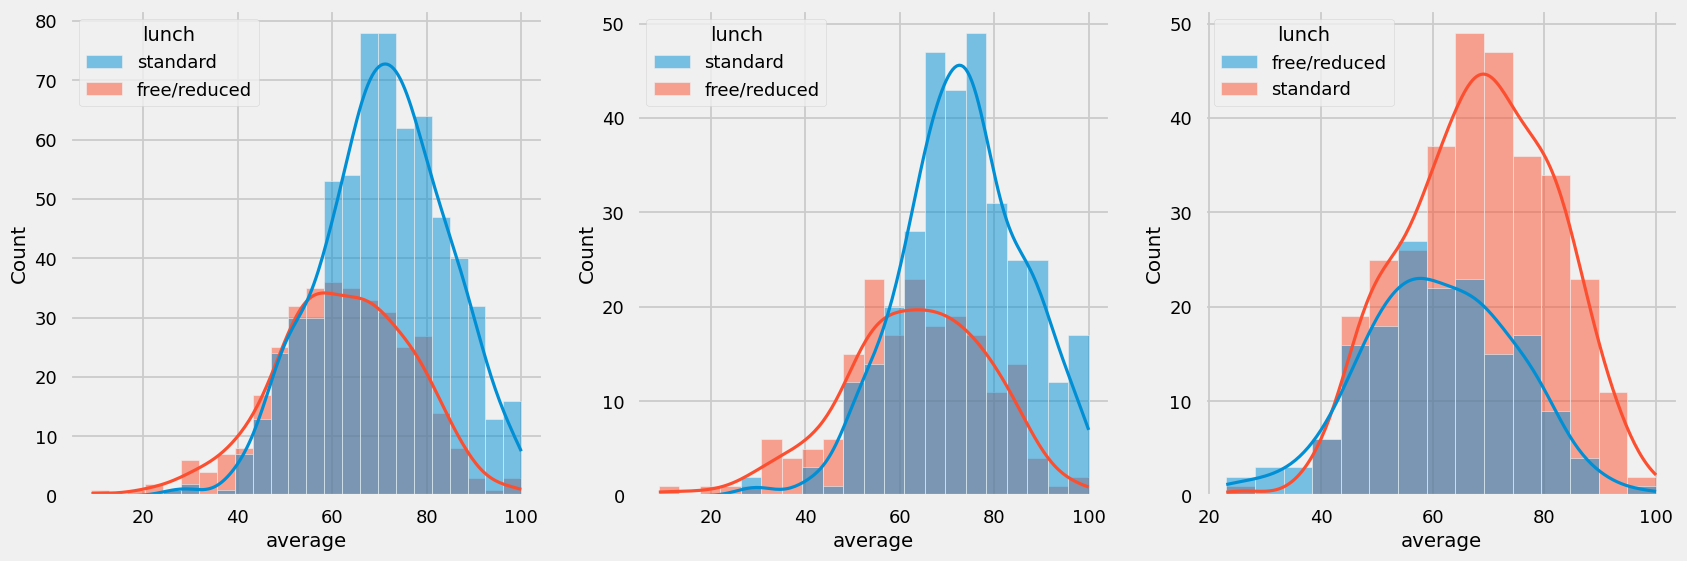

In [139]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True, hue='lunch')
plt.show

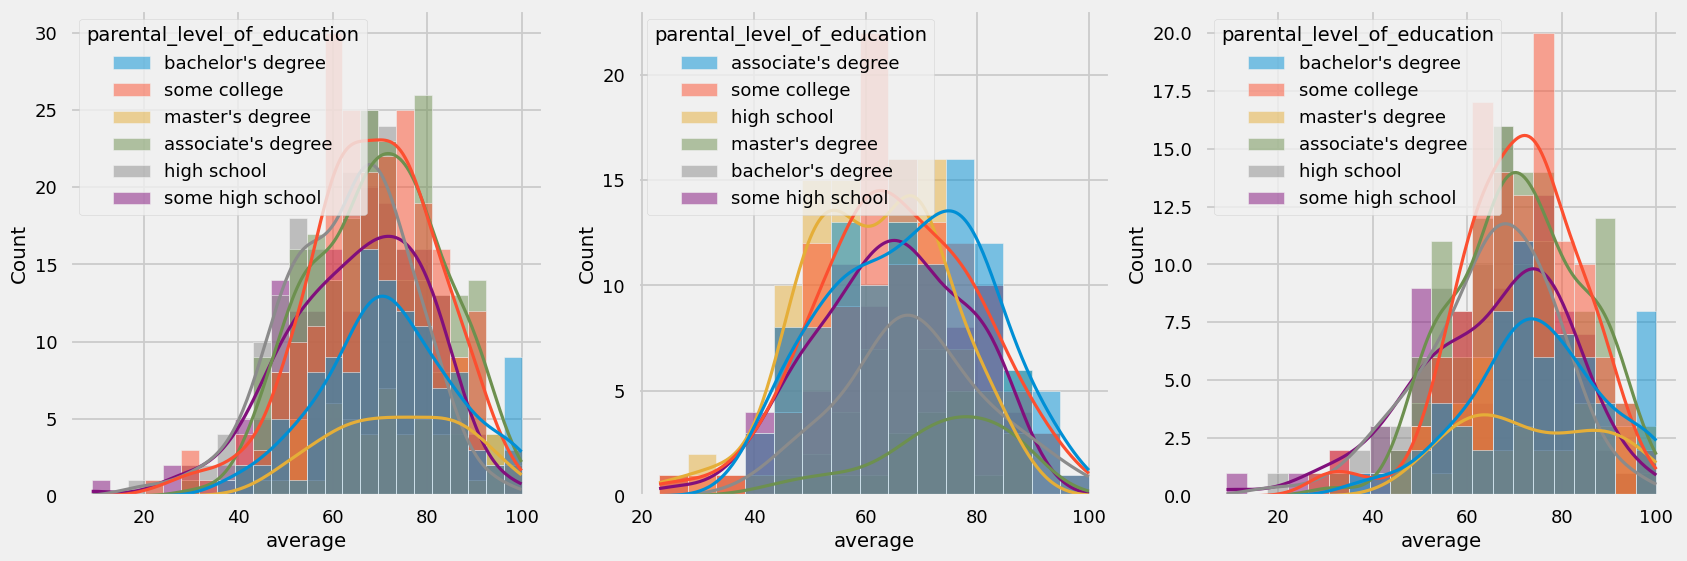

In [140]:
# parental level of education
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')

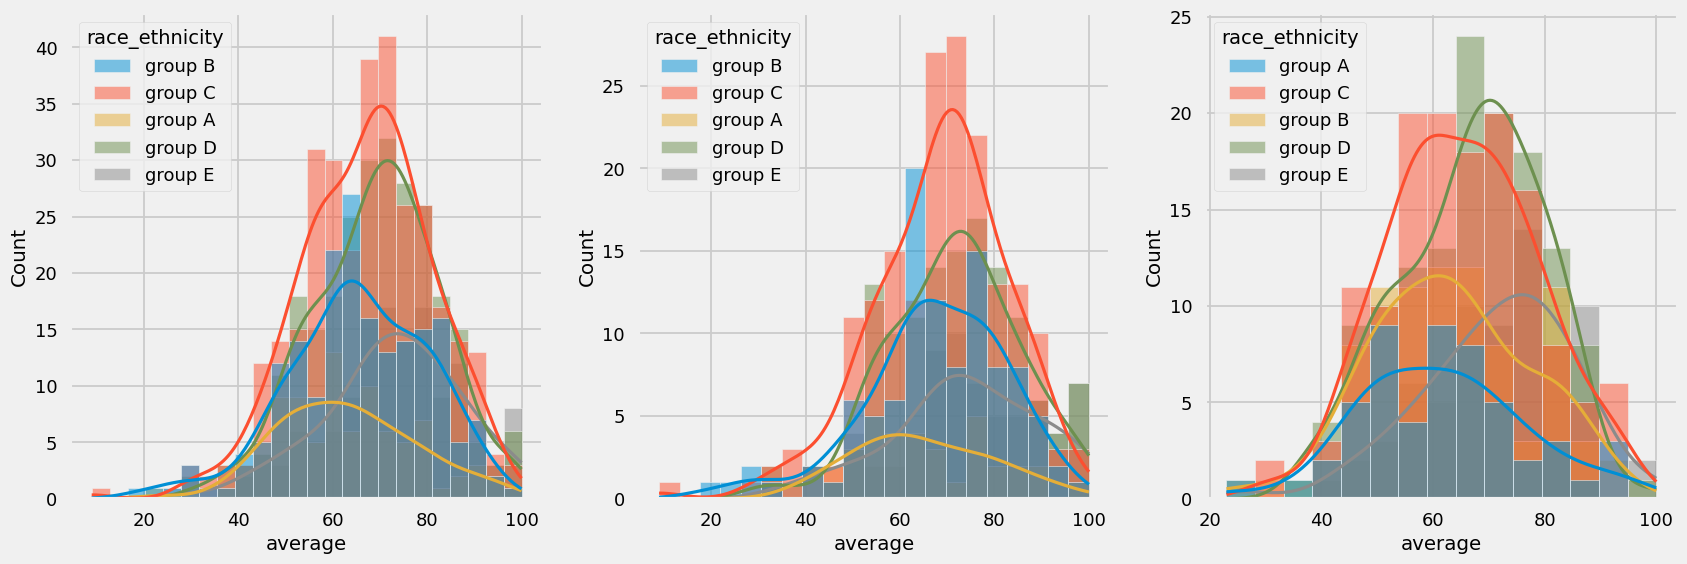

In [141]:
# race/ethnicity

plt.subplots(1,3,figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df,x='average',kde=True, hue='race_ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender== 'female'],x='average', kde=True, hue='race_ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender== 'male'], x='average', kde=True, hue='race_ethnicity')
plt.show()

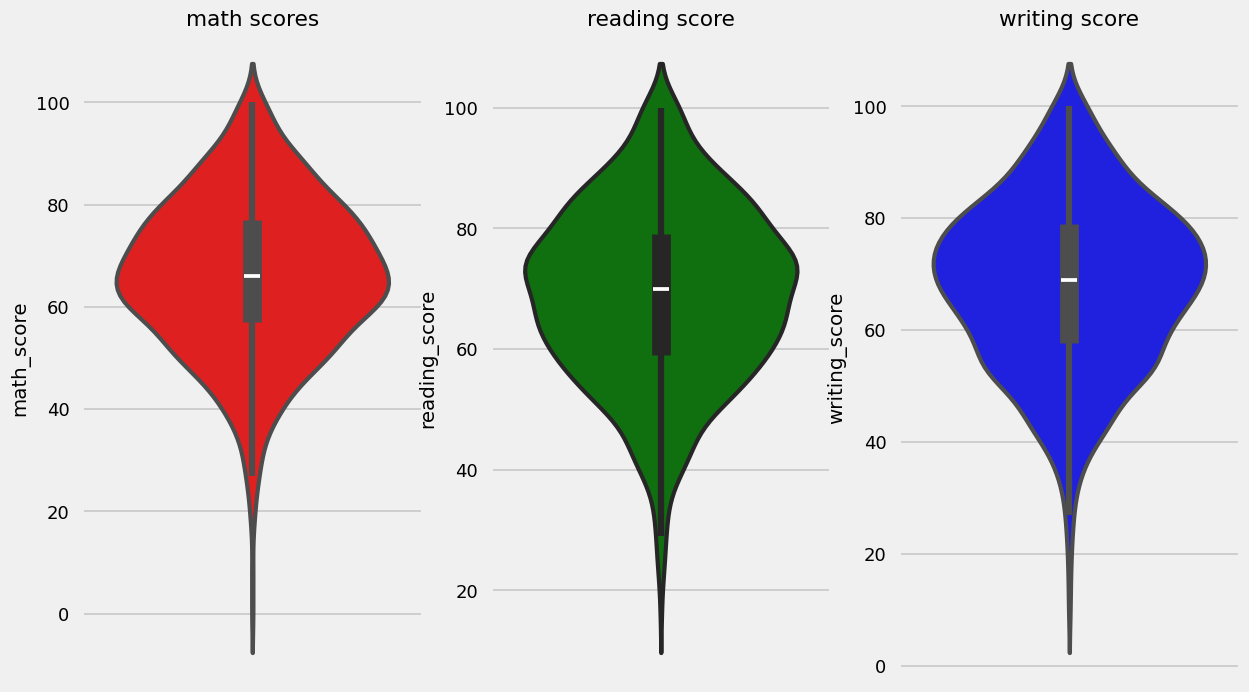

In [142]:
# maxmimum score of students in all three subjects

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('math scores')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('reading score')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('writing score')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

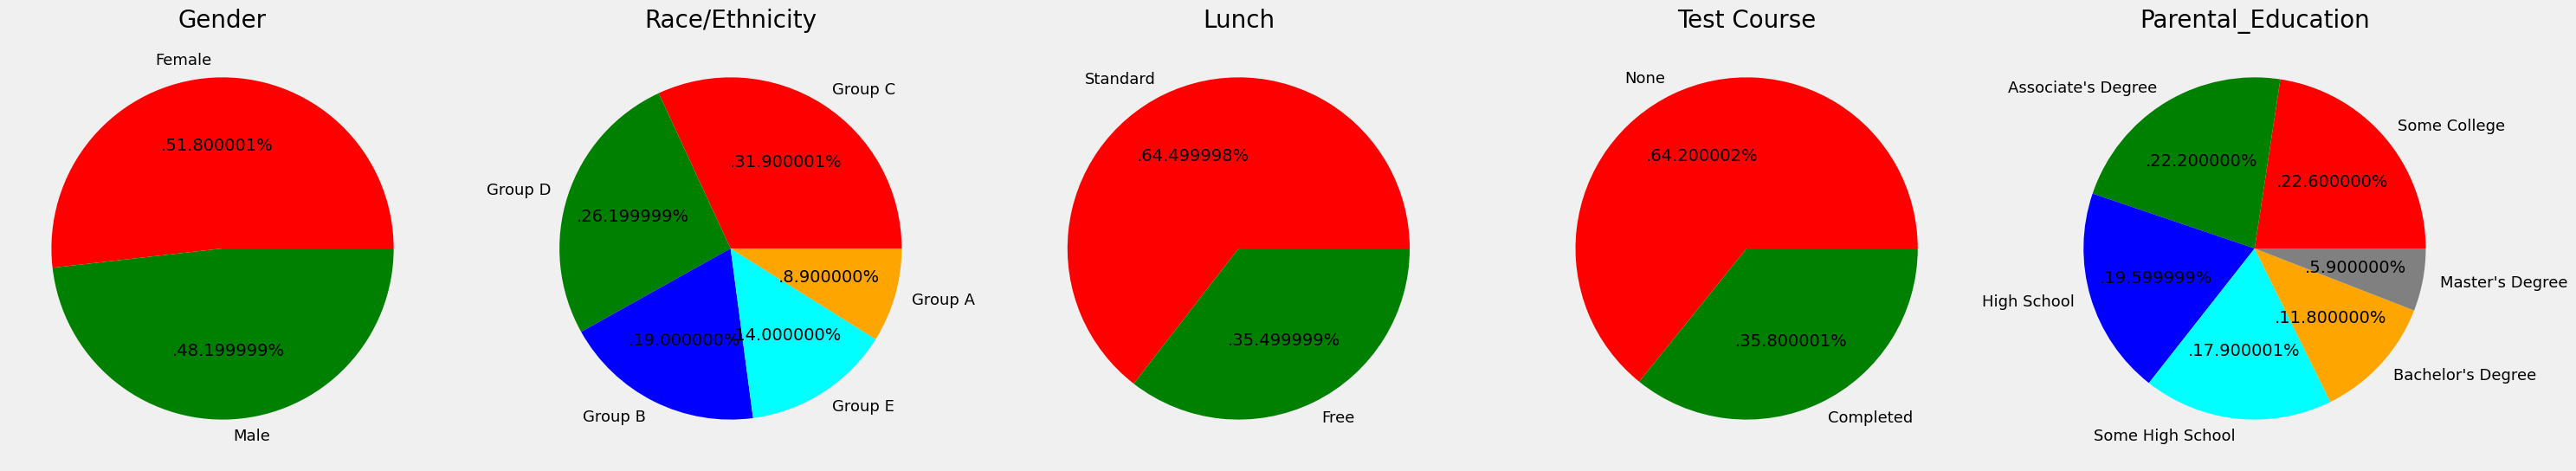

In [143]:
# multivariate analysis using pieplot

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

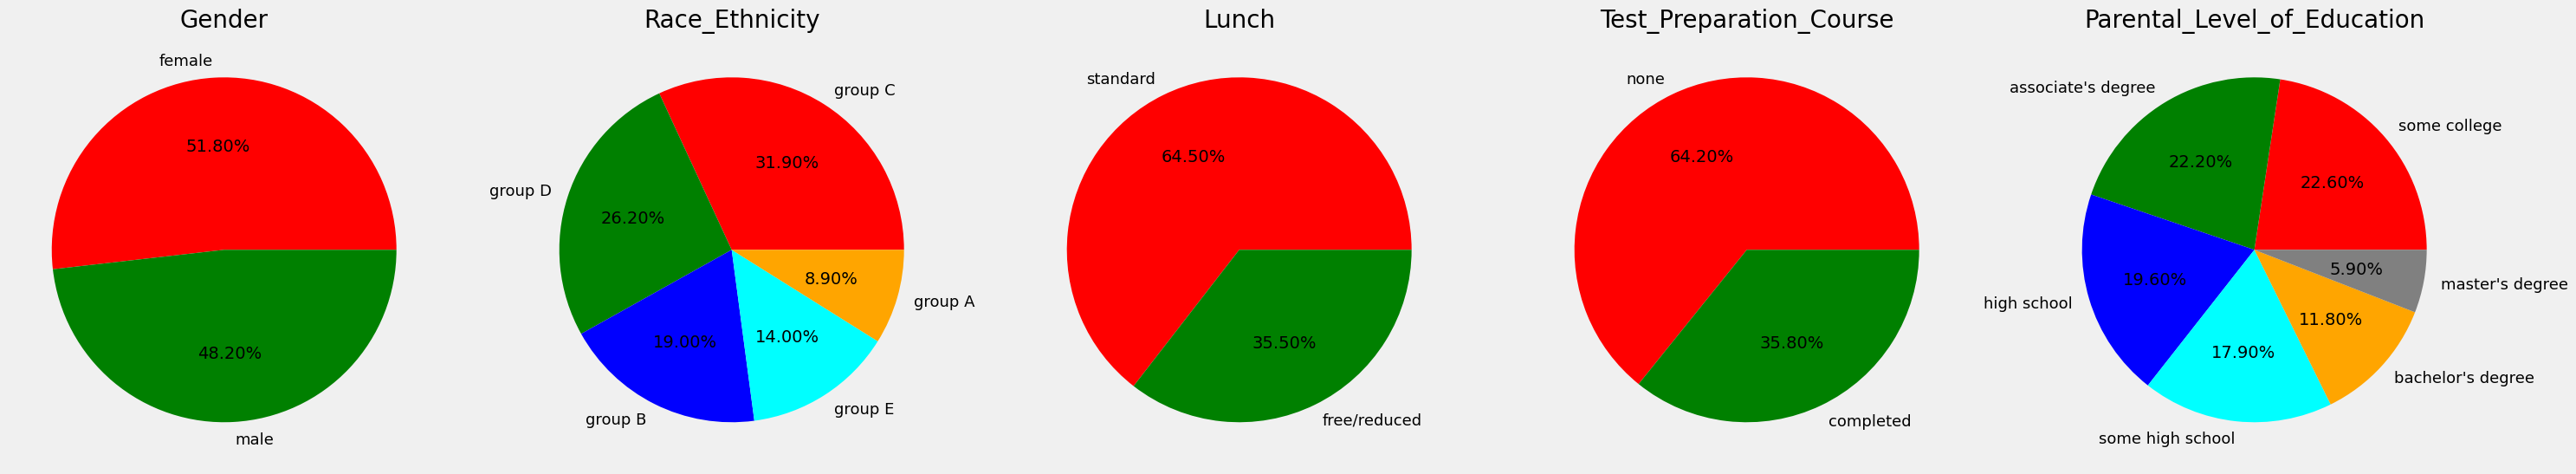

In [144]:
# import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

columns = [
    'gender',
    'race_ethnicity',
    'lunch',
    'test_preparation_course',
    'parental_level_of_education'
]

titles = [
    'Gender',
    'Race_Ethnicity',
    'Lunch',
    'Test_Preparation_Course',
    'Parental_Level_of_Education'
]

colors = [
    ['red', 'green'],
    ['red', 'green', 'blue', 'cyan', 'orange'],
    ['red', 'green'],
    ['red', 'green'],
    ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
]

for i, col in enumerate(columns):
    plt.subplot(1, 5, i + 1)
    counts = df[col].value_counts()
    
    plt.pie(
        counts,
        labels=counts.index,
        colors=colors[i],
        autopct='%1.2f%%'
    )
    
    plt.title(titles[i], fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()


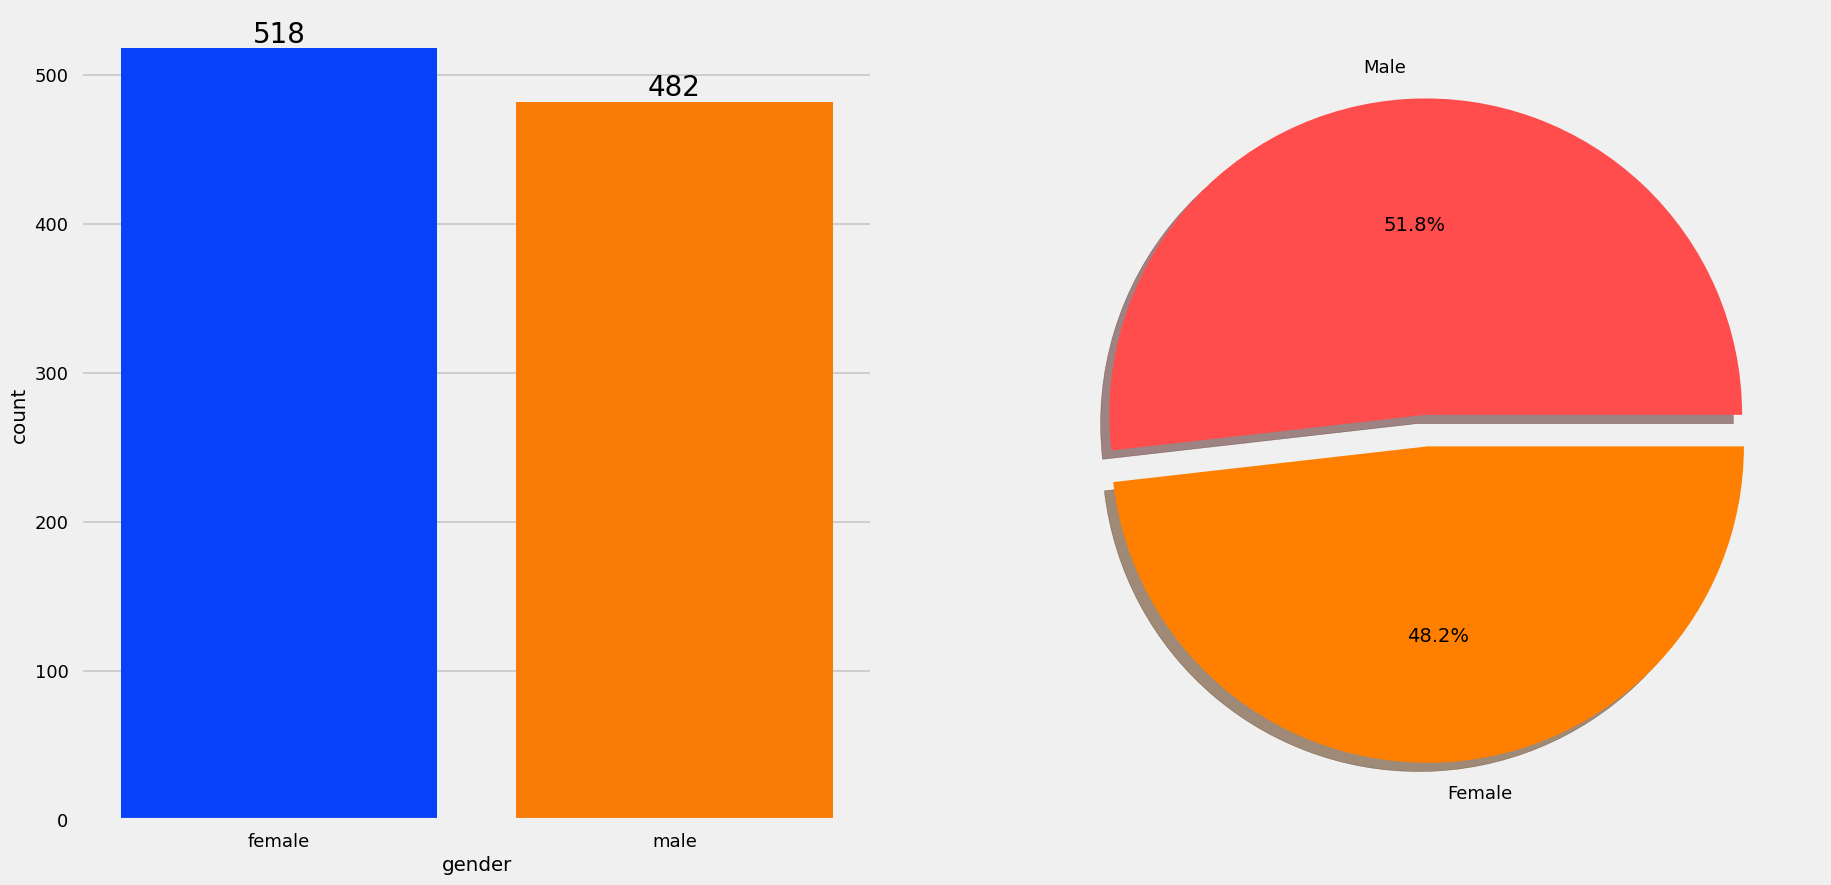

In [145]:
# 4.4 Feature Wise Visualization
# 4.4.1 GENDER COLUMN
# How is distribution of Gender ?
# Is gender has any impact on student's performance ?
# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )



f,ax= plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size='20')

plt.pie(x=df['gender'].value_counts(),labels=['Male', 'Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

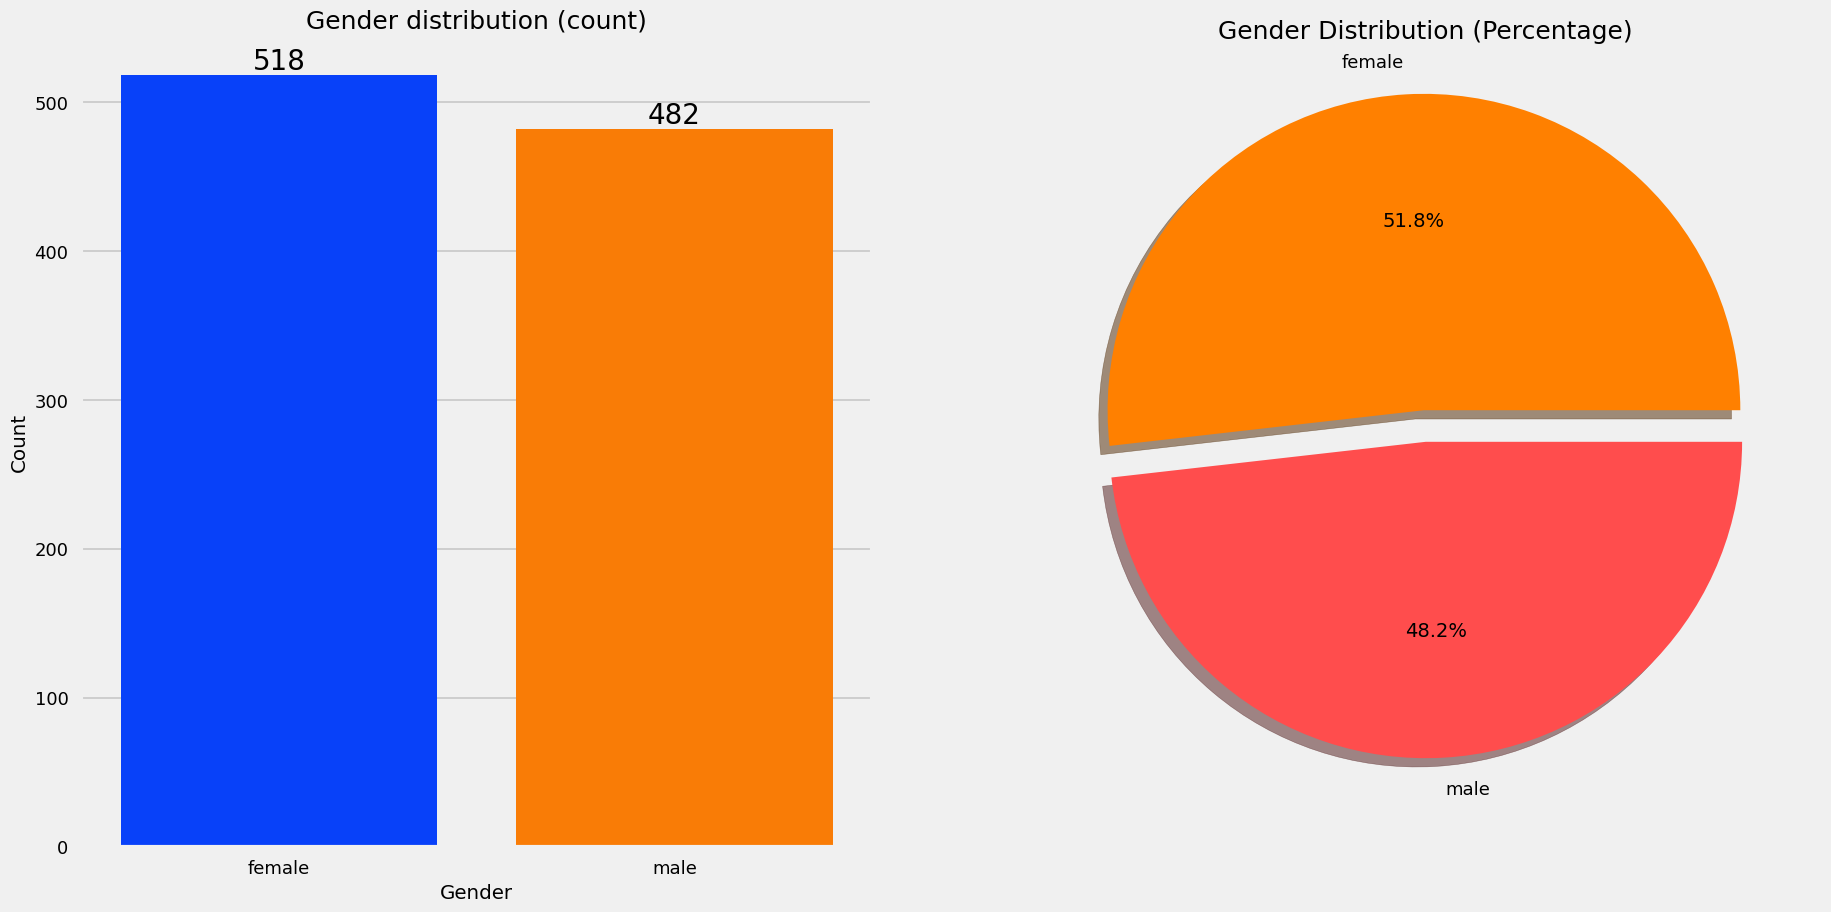

In [146]:
#  4.4.1 GENDER COLUMN
# How is distribution of Gender ?
# Is gender has any impact on student's performance ?
# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

f, ax =plt.subplots(1,2, figsize=(20,10))


sns.countplot(
    x='gender',
    data=df,
    palette='bright',
    ax=ax[0],
    saturation=0.95
)


for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

ax[0].set_title('Gender distribution (count)',fontsize=18)
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')

gender_counts = df['gender'].value_counts()

ax[1].pie(
    gender_counts.values,
    labels=gender_counts.index,
    explode=[0.1, 0],
    autopct='%1.1f%%',
    shadow=True,
    colors=['#ff8000','#ff4d4d']
 )

ax[1].set_title('Gender Distribution (Percentage)', fontsize= 18)
plt.show()

In [147]:
print(df.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')


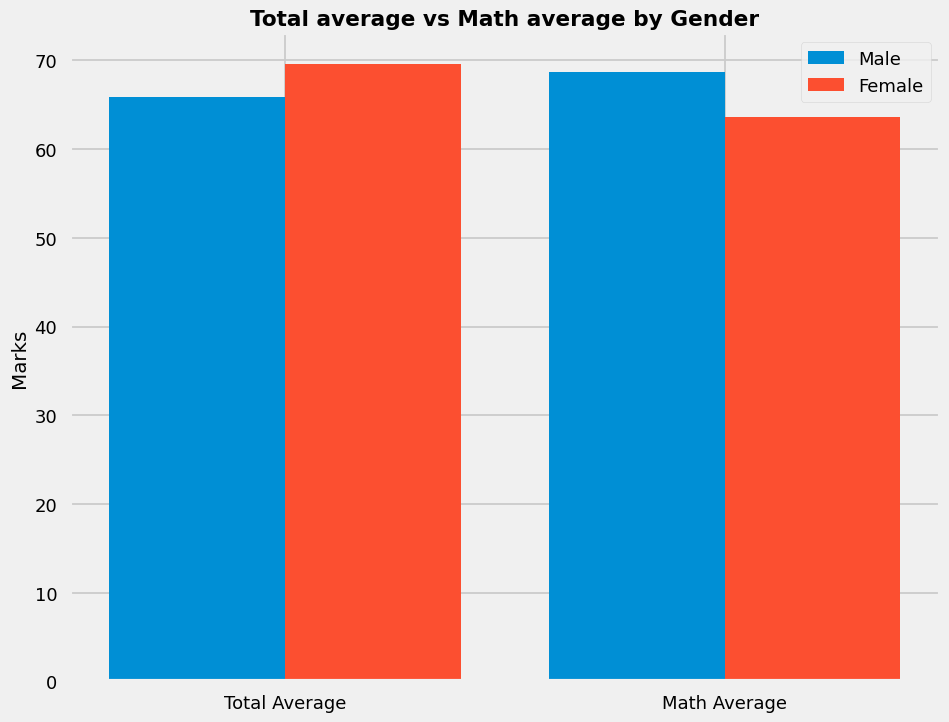

In [148]:
# Create average column
df['average'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3

# Group by gender (ONLY numeric columns)
gender_group = df.groupby('gender').mean(numeric_only=True)



plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [
    gender_group.loc['female', 'average'],
    gender_group.loc['female', 'math_score']
]

male_scores = [
    gender_group.loc['male', 'average'],
    gender_group.loc['male', 'math_score']
]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average by Gender", fontweight='bold')
plt.legend()
plt.show()


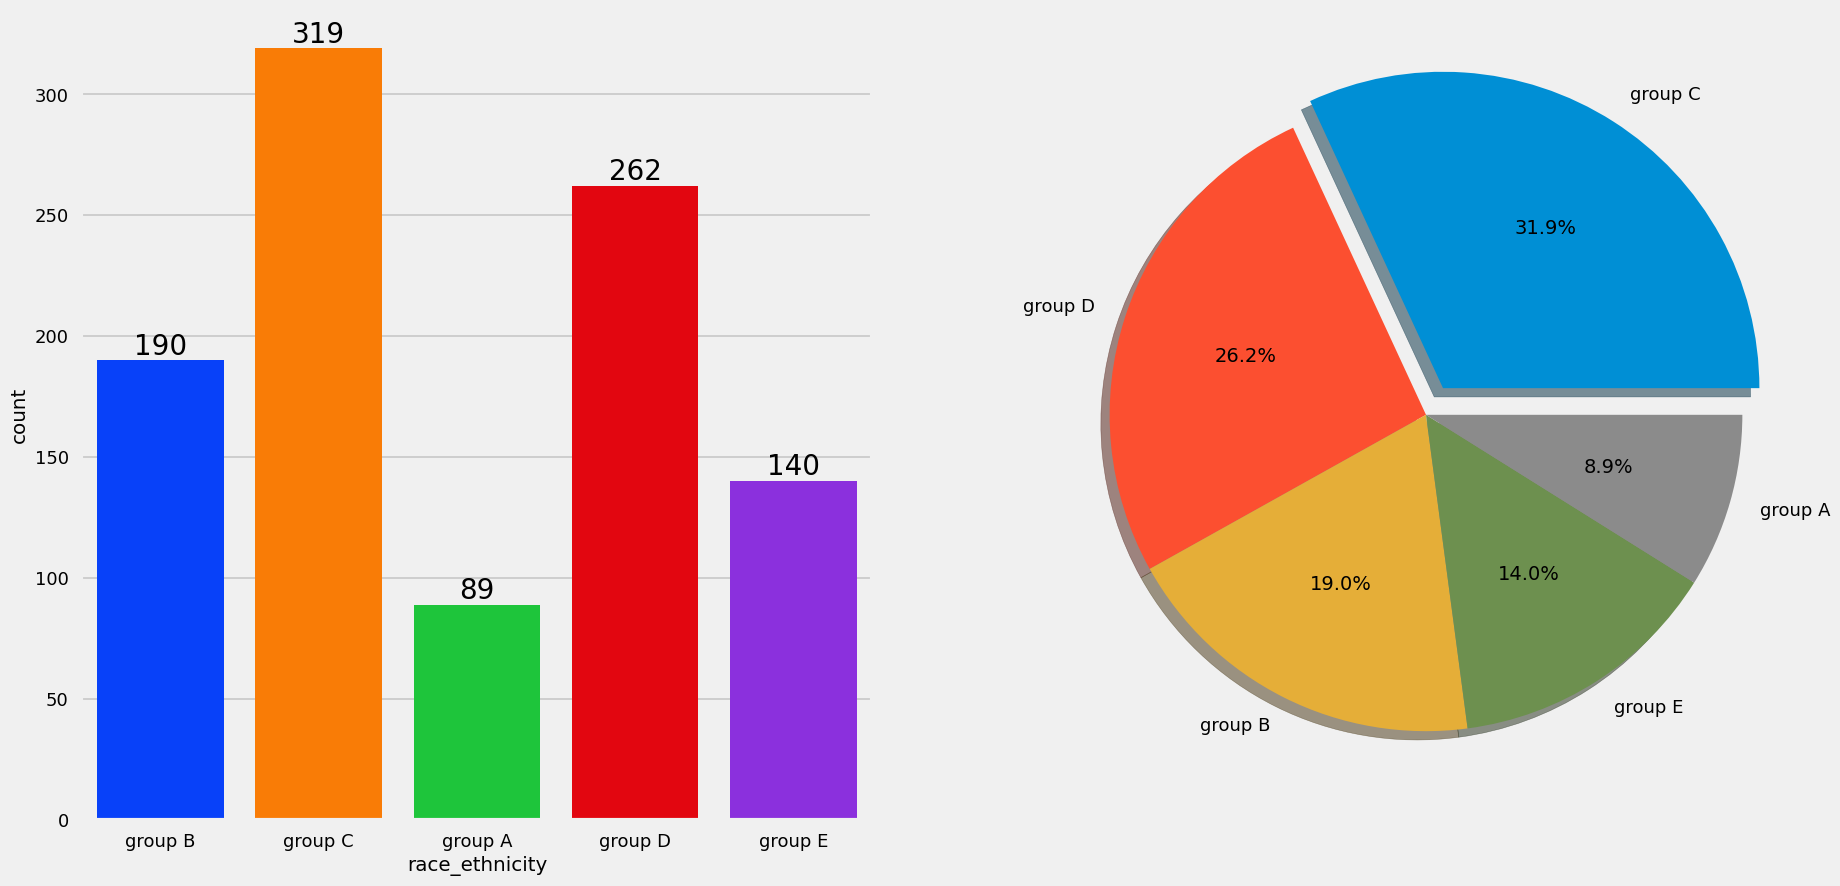

In [149]:
# 2. Race/Ethnicity Analysis
# UNIVARIATE ANALYSIS (Group-wise distribution)

# How is Group wise distribution ?
# Is Race/Ehnicity has any impact on student's performance ?

# 2. Race/Ethnicity Analysis
# UNIVARIATE ANALYSIS (Group-wise distribution)
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.show()

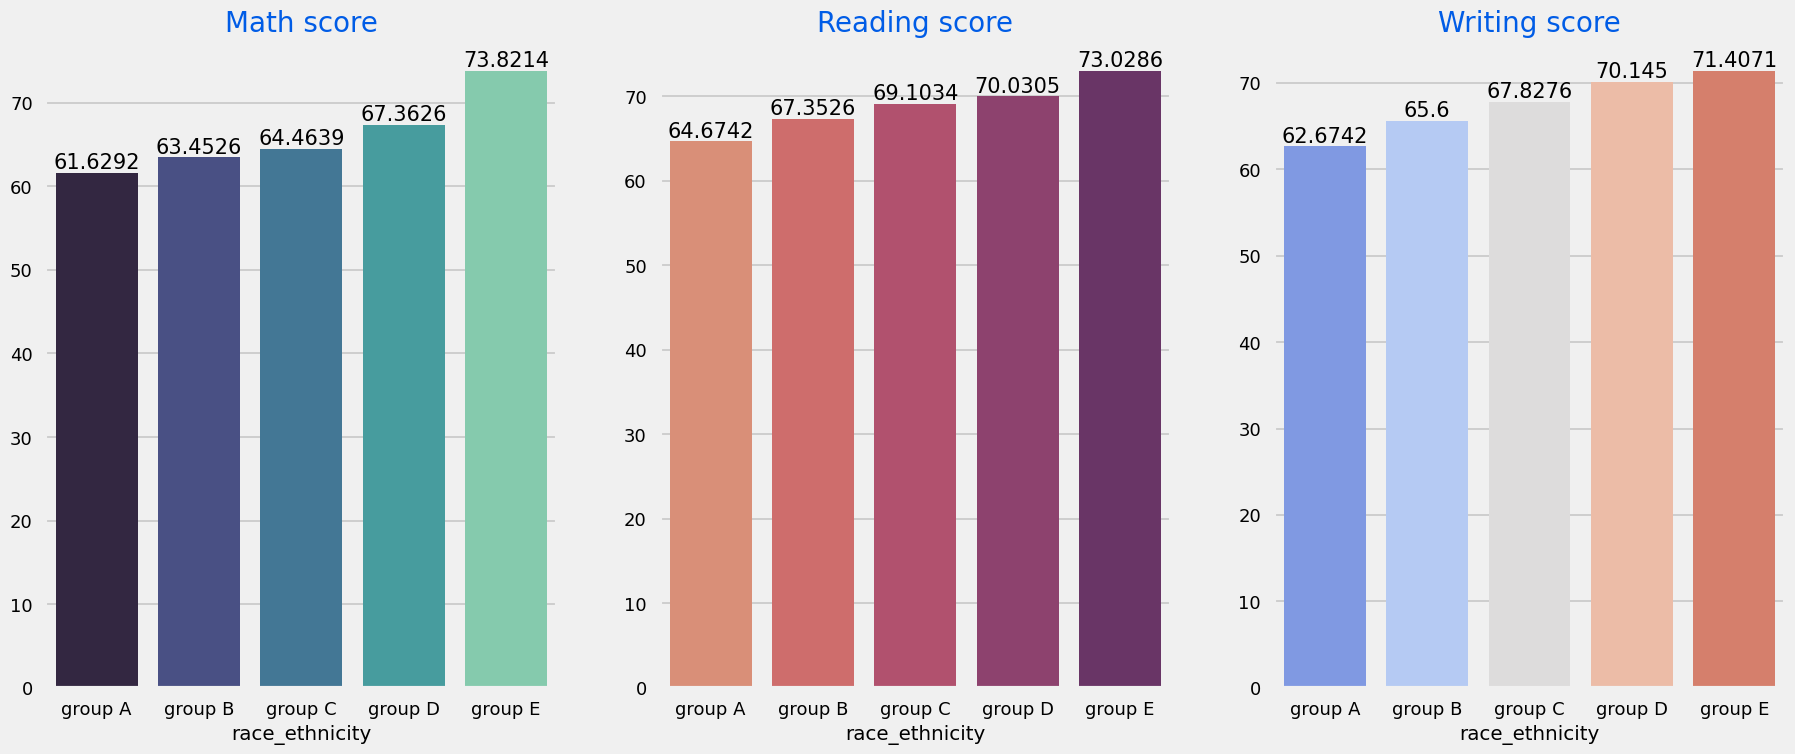

In [150]:
# BIVARIATE ANALYSIS (Impact of Race/Ethnicity on scores)
Group_data2 = df.groupby('race_ethnicity')

f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)


#     Shows average scores per race/ethnicity group for math, reading, writing.

# Insight: Group E highest, Group A lowest, likely reflecting socioeconomic status impact.

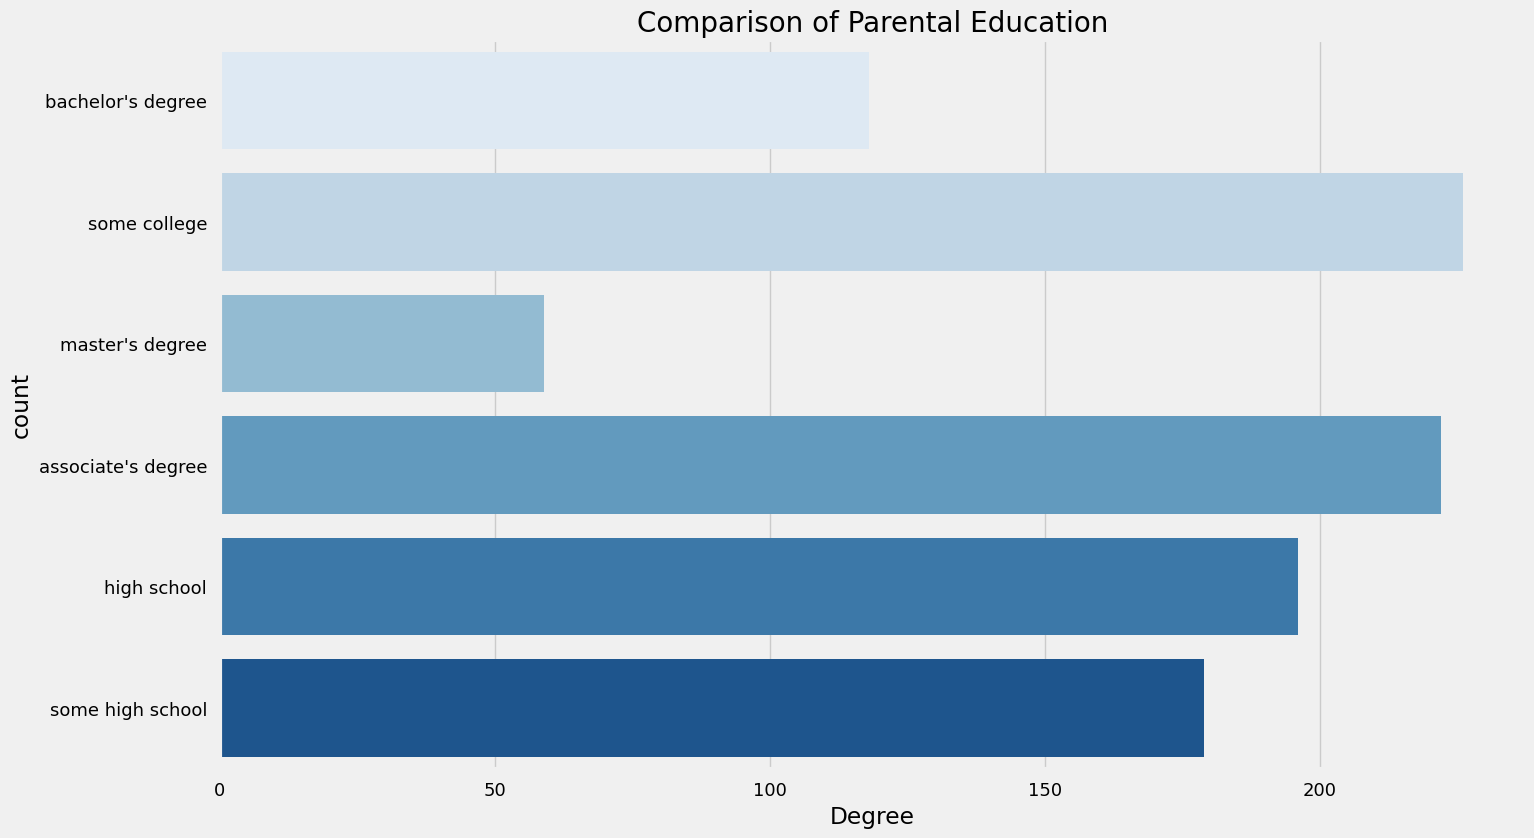

In [151]:
# 3. Parental Level of Education
# Univariate analysis

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()


# Shows distribution of parents' education levels.

# Insight: Largest group has some college education.

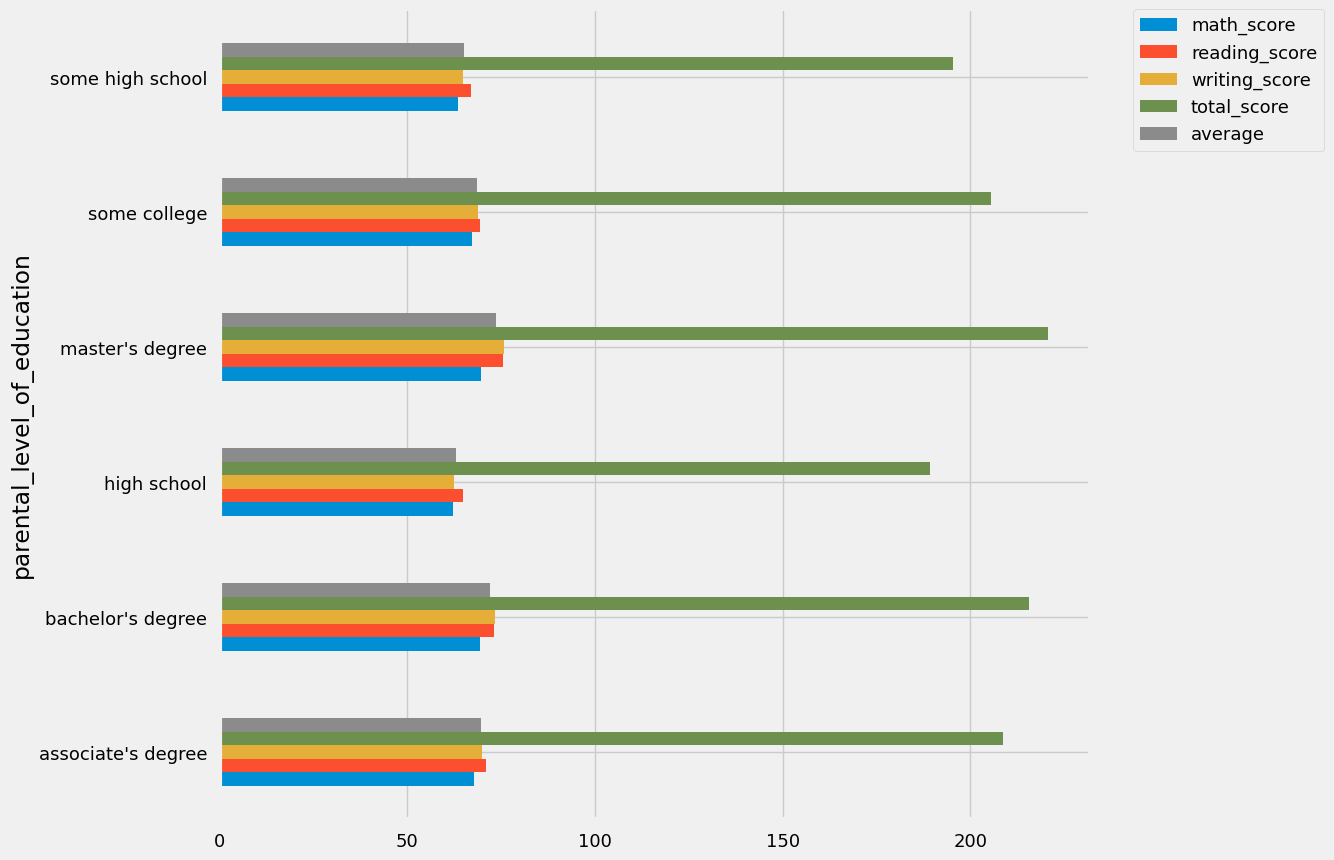

In [152]:
# Group by 'parental level of education' and aggregate only numeric columns
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))

# Optional: Adjust the legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



# Horizontal barplot showing mean scores grouped by parental education.

# Insight: Students with parents having bachelor or master degrees perform better.

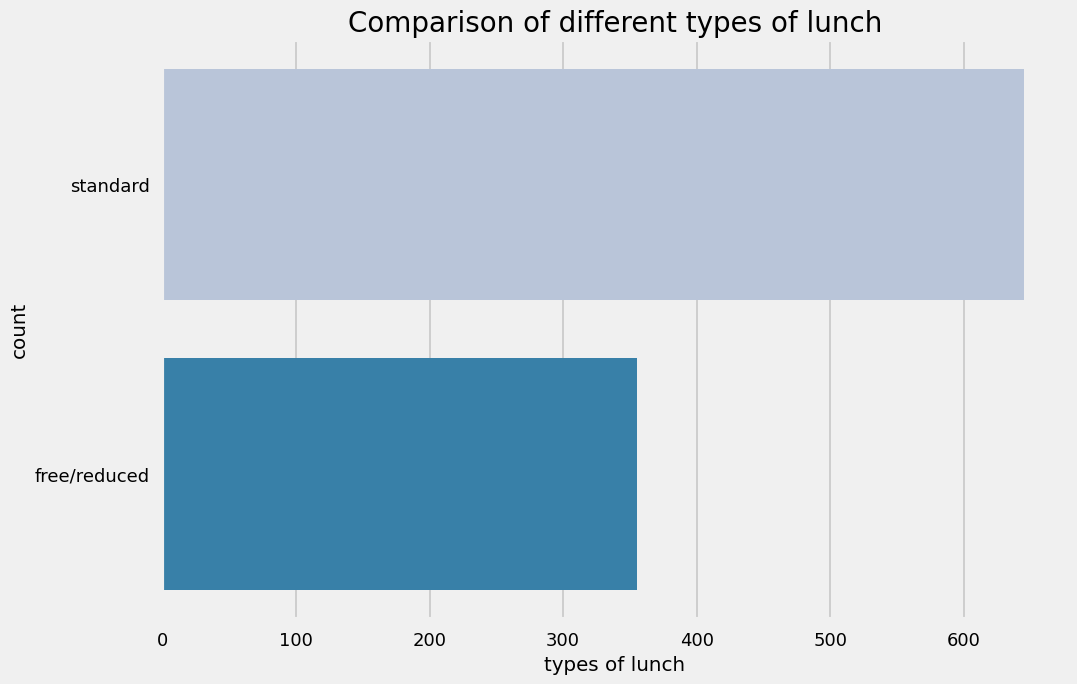

In [153]:
# 4. Lunch Column
# Univariate
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()


# Visualizes count of students by lunch type.

# Insight: Standard lunch more common than free/reduced.

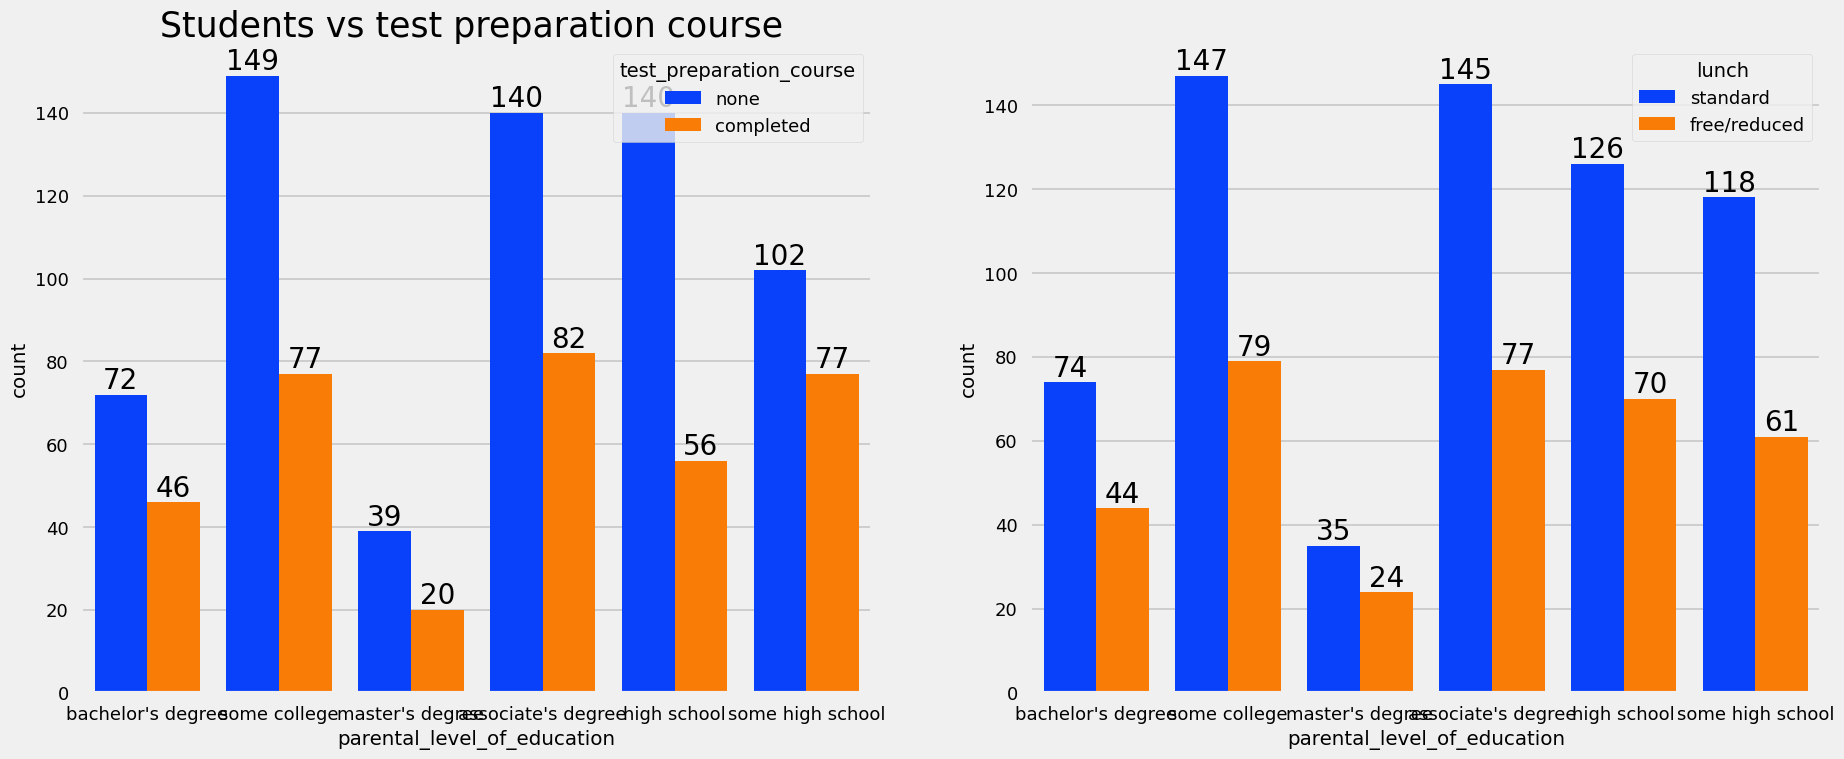

In [154]:
# Bivariate (Lunch impact on performance)



f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs test preparation course ', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)


# This shows parental education vs test prep course and lunch, not lunch vs scores.

# However, the insight you gave:

# Students who get Standard Lunch tend to perform better than students who got free/reduced lunch.

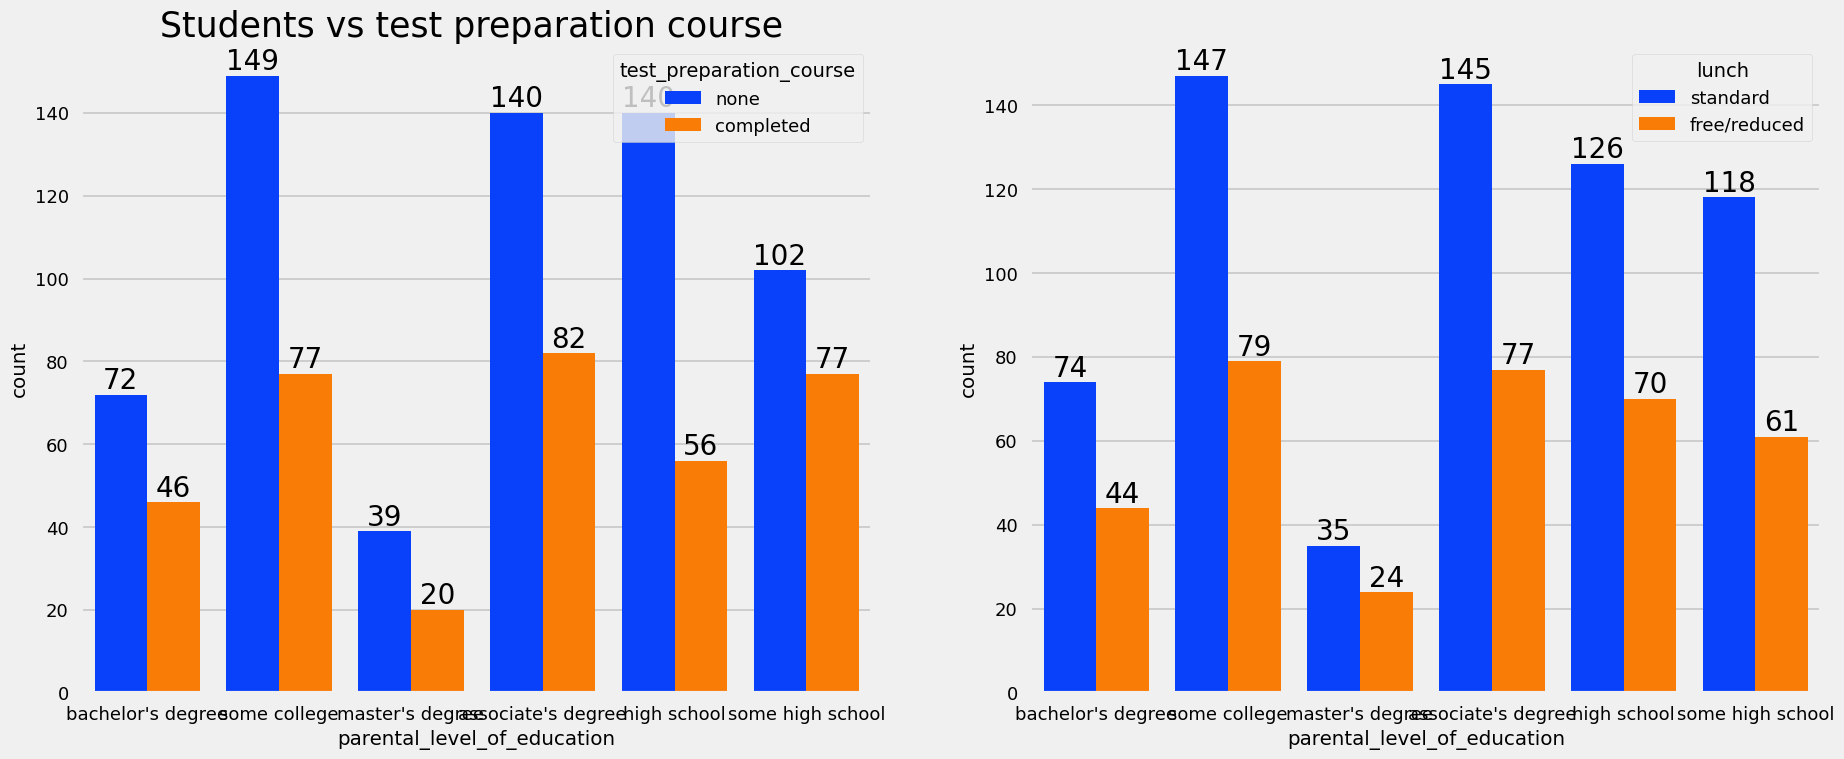

In [155]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

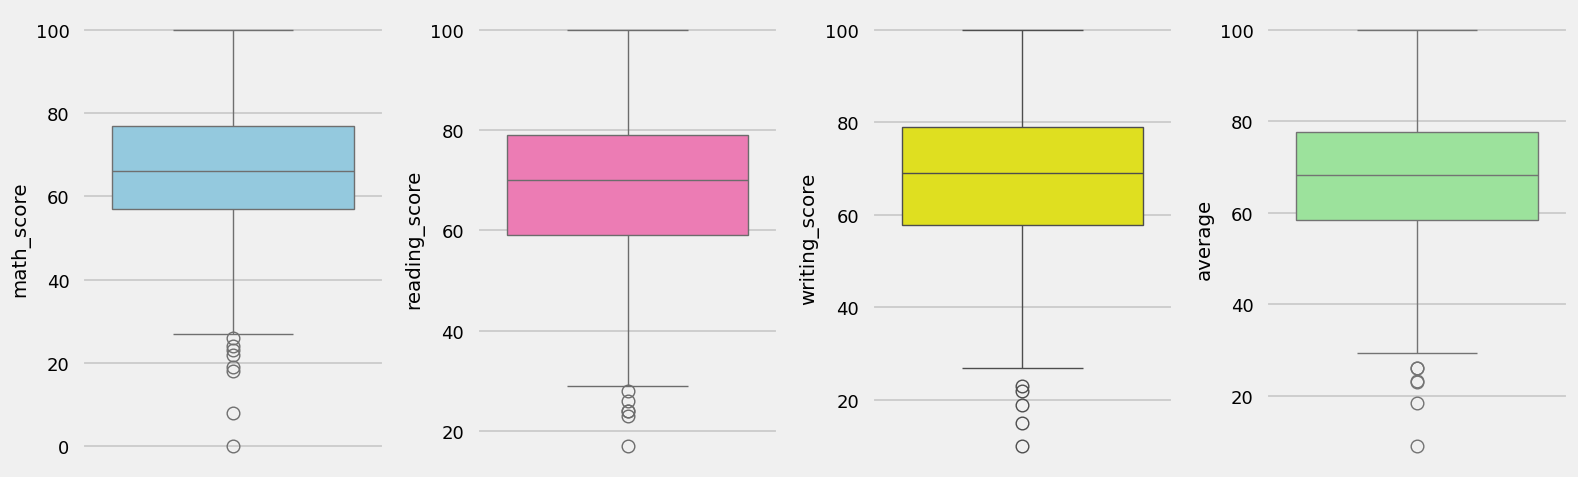

In [156]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.tight_layout() 
plt.show()

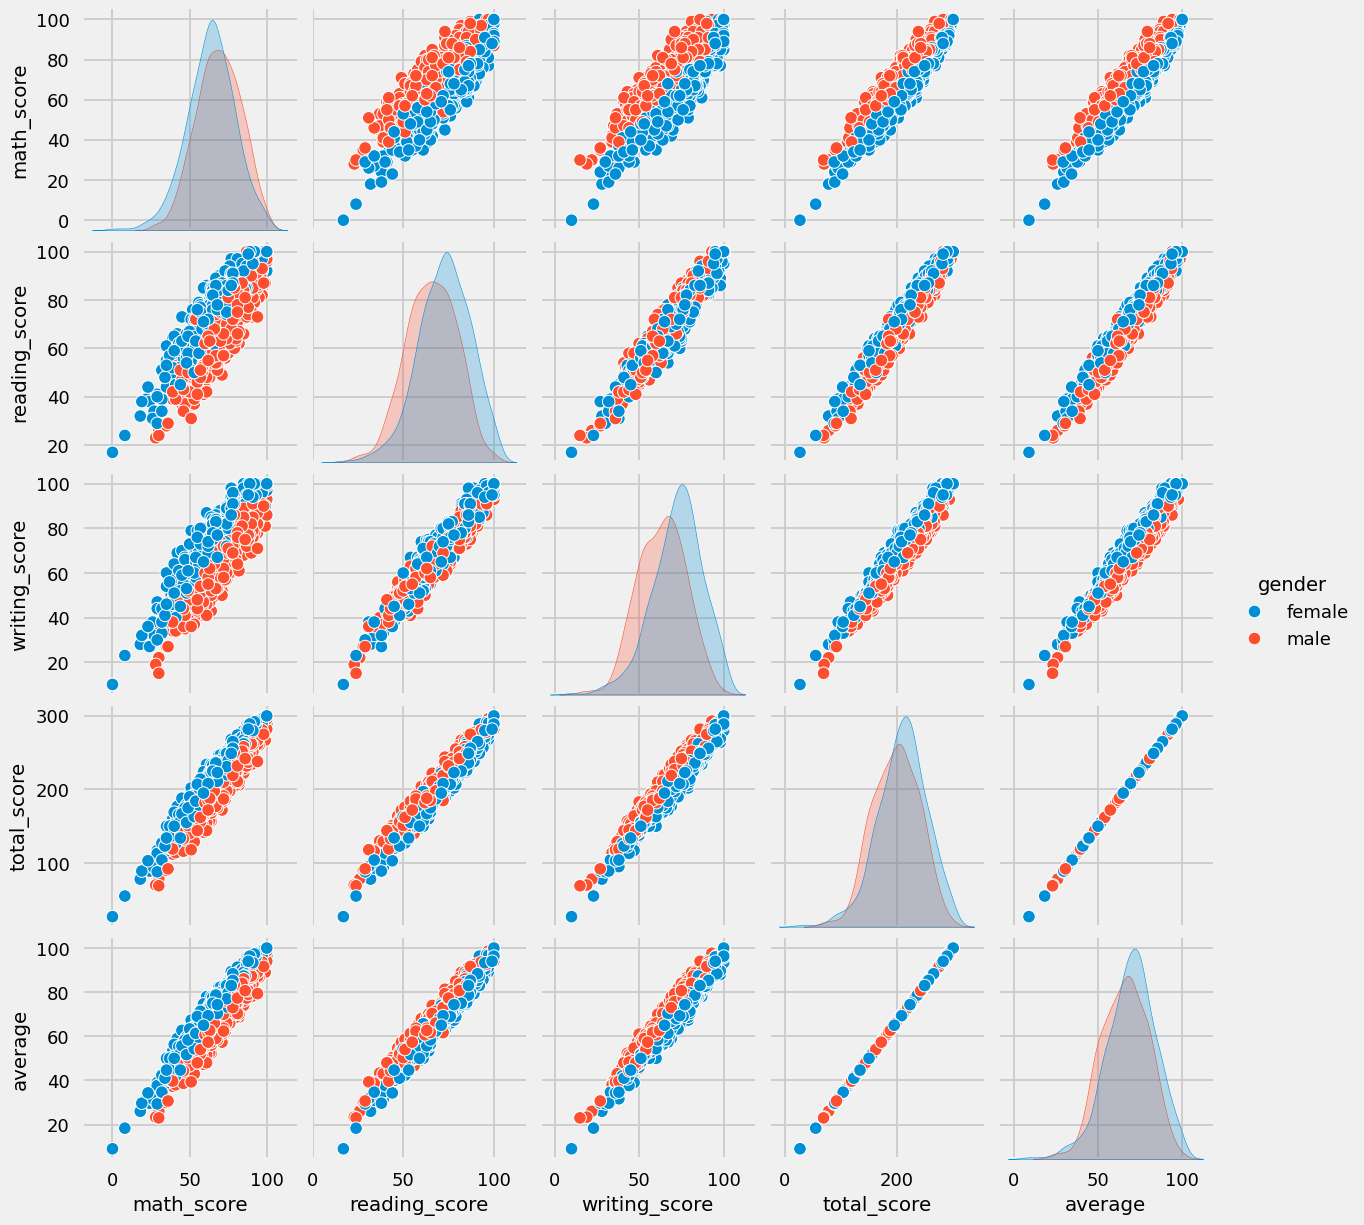

In [157]:
# UTIVARIATE ANALYSIS USING PAIRPLOT
sns.pairplot(df,hue = 'gender')
plt.show()

# Insights
# From the above plot it is clear that all the scores increase linearly with each other.
# 5. Conclusions
# Student's Performance is related with lunch, race, parental level education
# Females lead in pass percentage and also are top-scorers
# Student's Performance is not much related with test preparation course
# Finishing preparation course is benefitial.